#**STEP 1 : PERKENALAN**

**GRADED CHALLENGE 5**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Anomaly Detection**

**Graded Challenge 5 ini dibuat guna mengevaluasi konsep Anomaly Detection sebagai berikut :**

* Mampu memahami konsep Anomaly Detection dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Anomaly Detection
* Mampu mengimplementasikan Anomaly Detection pada data yang diberikan


## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **STEP 3 : DATA LOADING**

**Proses Read dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 1/Graded Challenge/h8dsft_P1W3AD/creditcard.csv')

**Data memiliki jumlah baris 284807 dan jumlah kolom 31**

In [4]:
data.shape

(284807, 31)

## **STEP 4 : DATA EXPLORATION**

**Melihat isi 10 data pertama**

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Melihat 10 data Middle**

In [6]:
284807 / 2

142403.5

In [7]:
data[142400:142410]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142400,84690.0,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,-1.297413,0.294670,1.667685,-0.073242,0.099373,-1.902650,-0.383956,0.956468,-0.050516,0.367352,-0.407173,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
142401,84691.0,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,0.643005,0.354594,0.622780,-0.185262,0.839671,0.222912,0.821306,-0.504422,0.438419,0.433290,0.348312,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0
142402,84691.0,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,-0.356330,-0.396822,-0.719414,-1.320346,-0.386616,0.229522,0.894801,-1.227087,-0.184424,-1.979680,-0.267422,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789,5.99,0
142403,84692.0,1.125592,-0.147999,1.151008,1.158851,-0.823914,0.298829,-0.708732,0.294683,0.750838,-0.015336,0.506095,0.722429,-0.632942,-0.054609,-0.427454,0.400527,-0.581417,0.619128,0.204922,-0.145904,-0.037453,0.024388,-0.052720,-0.003615,0.405682,-0.404597,0.063357,0.024091,12.99,0
142404,84693.0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,0.352698,1.033706,-0.058832,-1.035406,0.514048,0.740893,-0.373862,-0.325962,0.360276,0.463212,0.211867,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
142405,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,5.416042,-8.164125,-0.165011,-10.193530,-1.895210,-7.360475,-14.668771,-4.877119,1.385610,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
142406,84695.0,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,-0.120472,1.278799,1.600888,0.687623,-0.334877,-0.591809,0.271403,-0.391718,0.111543,0.148289,0.069161,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
142407,84695.0,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,-0.100331,1.863432,1.447944,0.623840,0.484863,0.187976,0.303599,-0.463637,-0.602120,0.443652,0.240978,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
142408,84696.0,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,0.155907,-0.471518,-0.662773,-1.727412,0.303559,0.876071,-1.530284,1.118193,-0.536345,1.391628,-0.068915,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140,2.60,0
142409,84697.0,-3.475135,2.733552,-2.076117,-1.397827,0.989148,3.186942,-1.068531,2.213936,0.257606,1.155245,-0.502183,0.312496,0.191305,0.745148,1.057144,0.750413,-0.442539,0.091274,0.277030,0.243802,-0.265222,-0.975984,0.164327,0.965447,0.143647,-0.045636,-1.238443,-0.607945,19.98,0


**Melihat isi 10 data terakhir**

In [8]:
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**Melihat semua nama kolom yang terdapat pada dataset**

In [9]:
data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

**Melihat value pada kolom target, yaitu kolom Class**

In [10]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Melihat nilai keseluruhan data dari masing-masing kolom**

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [14]:
dtc =  data.copy()

**Melihat jumlah data yang missing values pada semua kolom**

In [15]:
dtc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Melihat apakah ada data yang duplicate**

In [16]:
dtc.duplicated().any()

True

**Melihat banyak data yang duplicate**

In [17]:
dtc.duplicated().sum()

1081

In [18]:
dtc[dtc.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


**Menghapus data yang duplicate dan cek kembali**

In [19]:
dtc.drop_duplicates(inplace=True)

In [20]:
dtc.duplicated().any()

False

In [21]:
dtc.duplicated().sum()

0

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

In [22]:
dtp = dtc.copy()

**Membuat variabel firur dan drop kolom target "Class"**

In [23]:
features = dtp.drop(columns=["Class"]).columns.tolist()
len(features)

30

### **Visualization**

**Plot kolom Class**

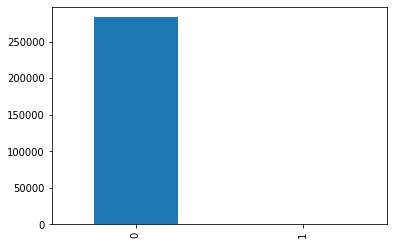

In [24]:
dtp['Class'].value_counts().plot(kind='bar')

**Plot semua kolom fitur**

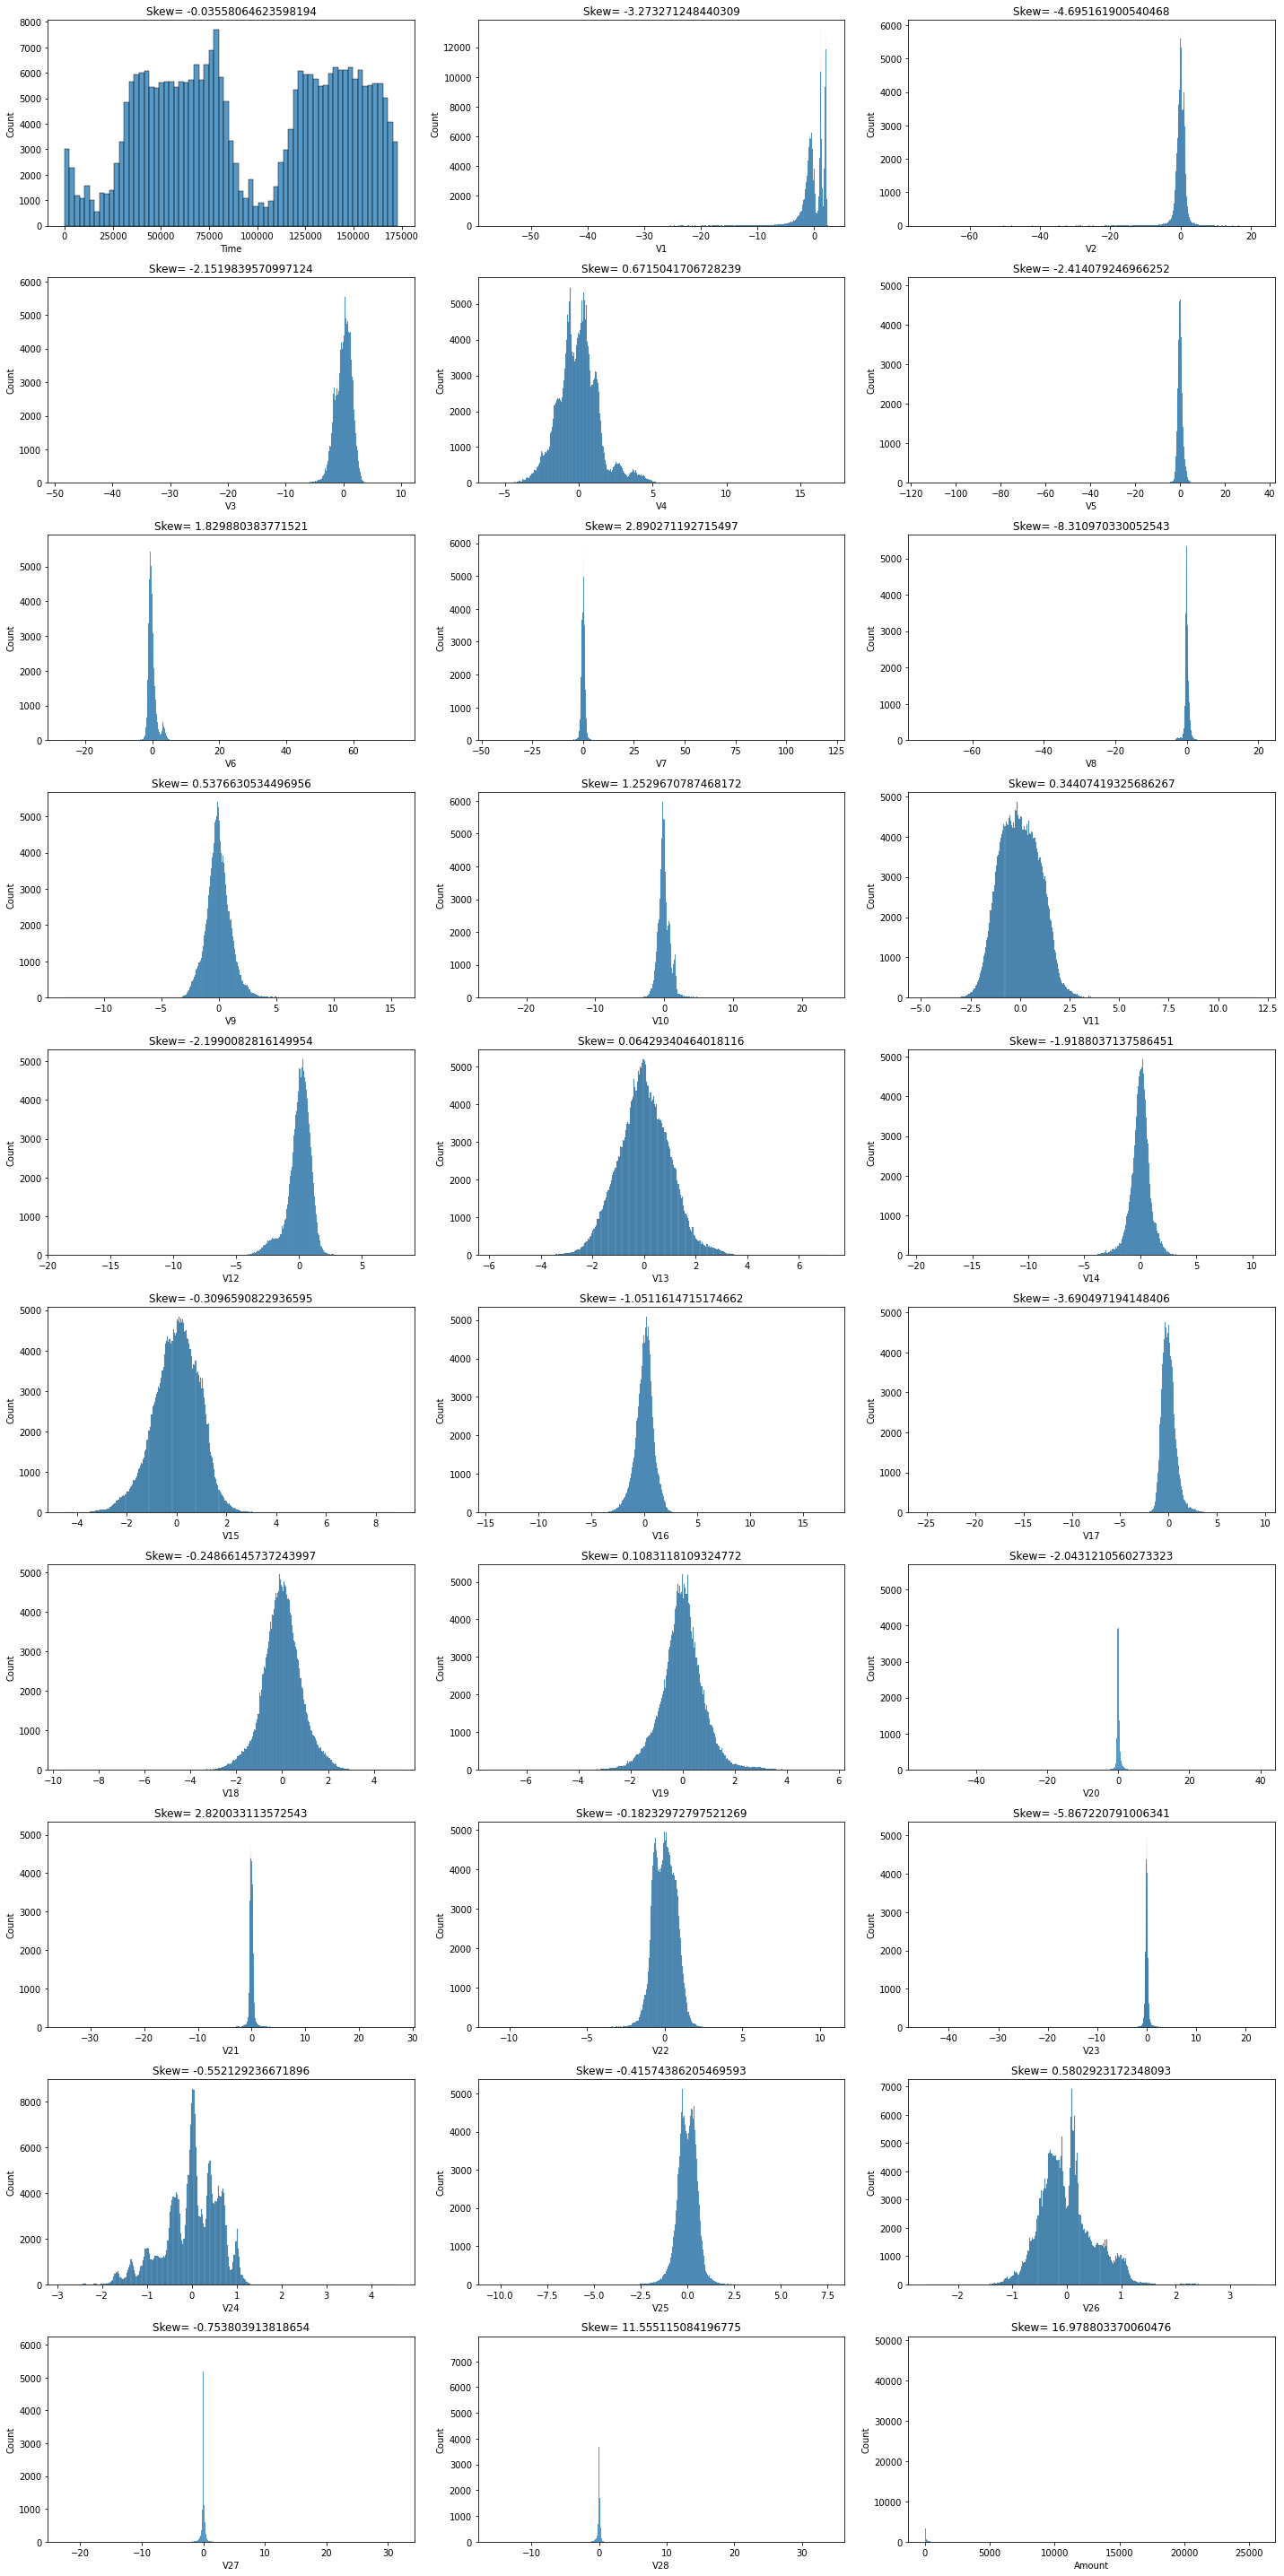

In [25]:
plt.figure(figsize=(20, 40))
for i in range(len(features)):
    plt.subplot(len(features)//3, 3, i + 1)
    sns.histplot(
        x = dtp[features[i]]
    )
    plt.title(f"Skew= {dtp[features[i]].skew()}")
plt.tight_layout()
plt.show()

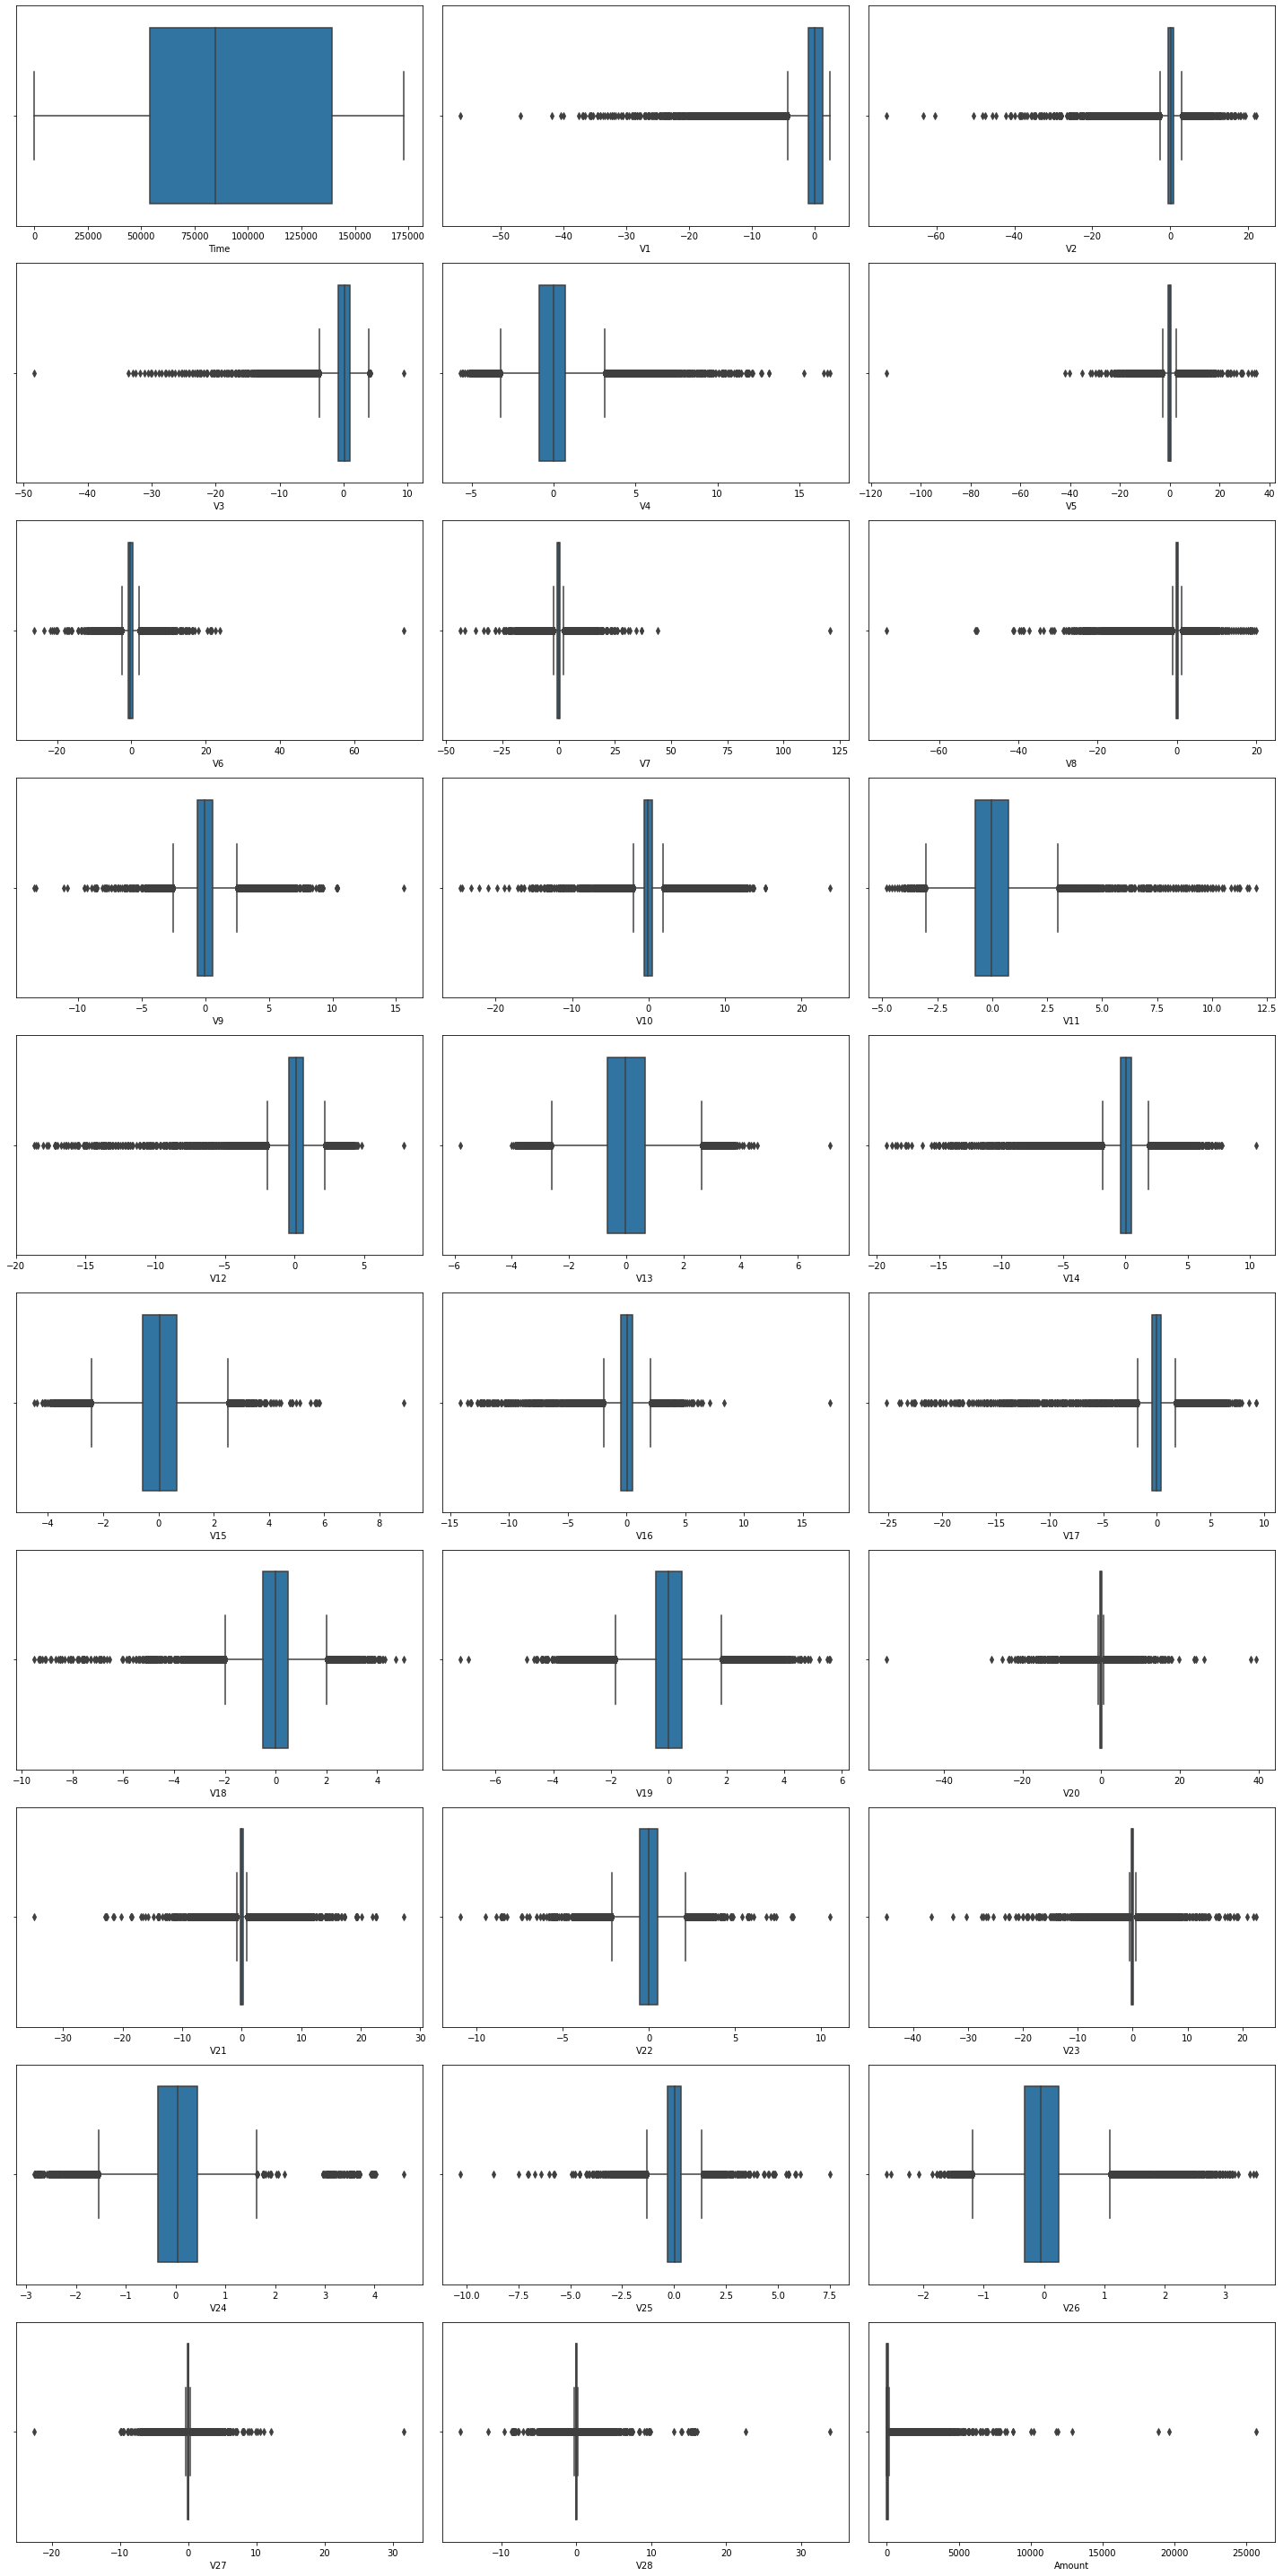

In [26]:
plt.figure(figsize=(20, 40))
for i in range(len(features)):
    plt.subplot(len(features)//3, 3, i + 1)
    sns.boxplot(
        x = dtp[features[i]]
    )
plt.tight_layout()
plt.show()

**Seluruh kelompok data (V1-28) memiliki outlier yang merata sehingga untuk memudahkan untuk analisis EDA akan dilakukan per Class Label**

<Figure size 720x720 with 0 Axes>

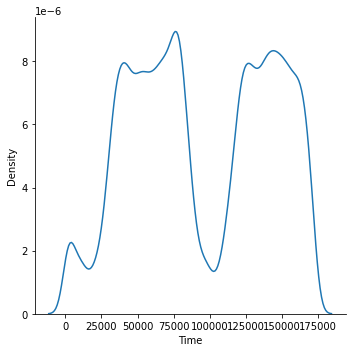

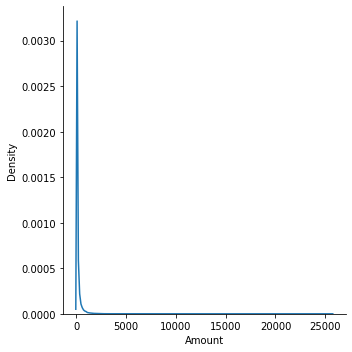

In [27]:
plt.figure(figsize = (10, 10))
sns.displot(data=dtp , x="Time", kind="kde")
sns.displot(data=dtp , x="Amount", kind="kde")

**Time memiliki kencenderungan distribusi normal. Amount memiliki skewness ke kiri dengan jumlah outlier sesuai dengan plot.**

### **Class Separate**

**Memisahkan variabel class yang bernilai 0 dan 1**

In [28]:
dtp_c0 = dtp[dtp['Class'] == 0]
dtp_c1 = dtp[dtp['Class'] == 1]

### **Class = 0**

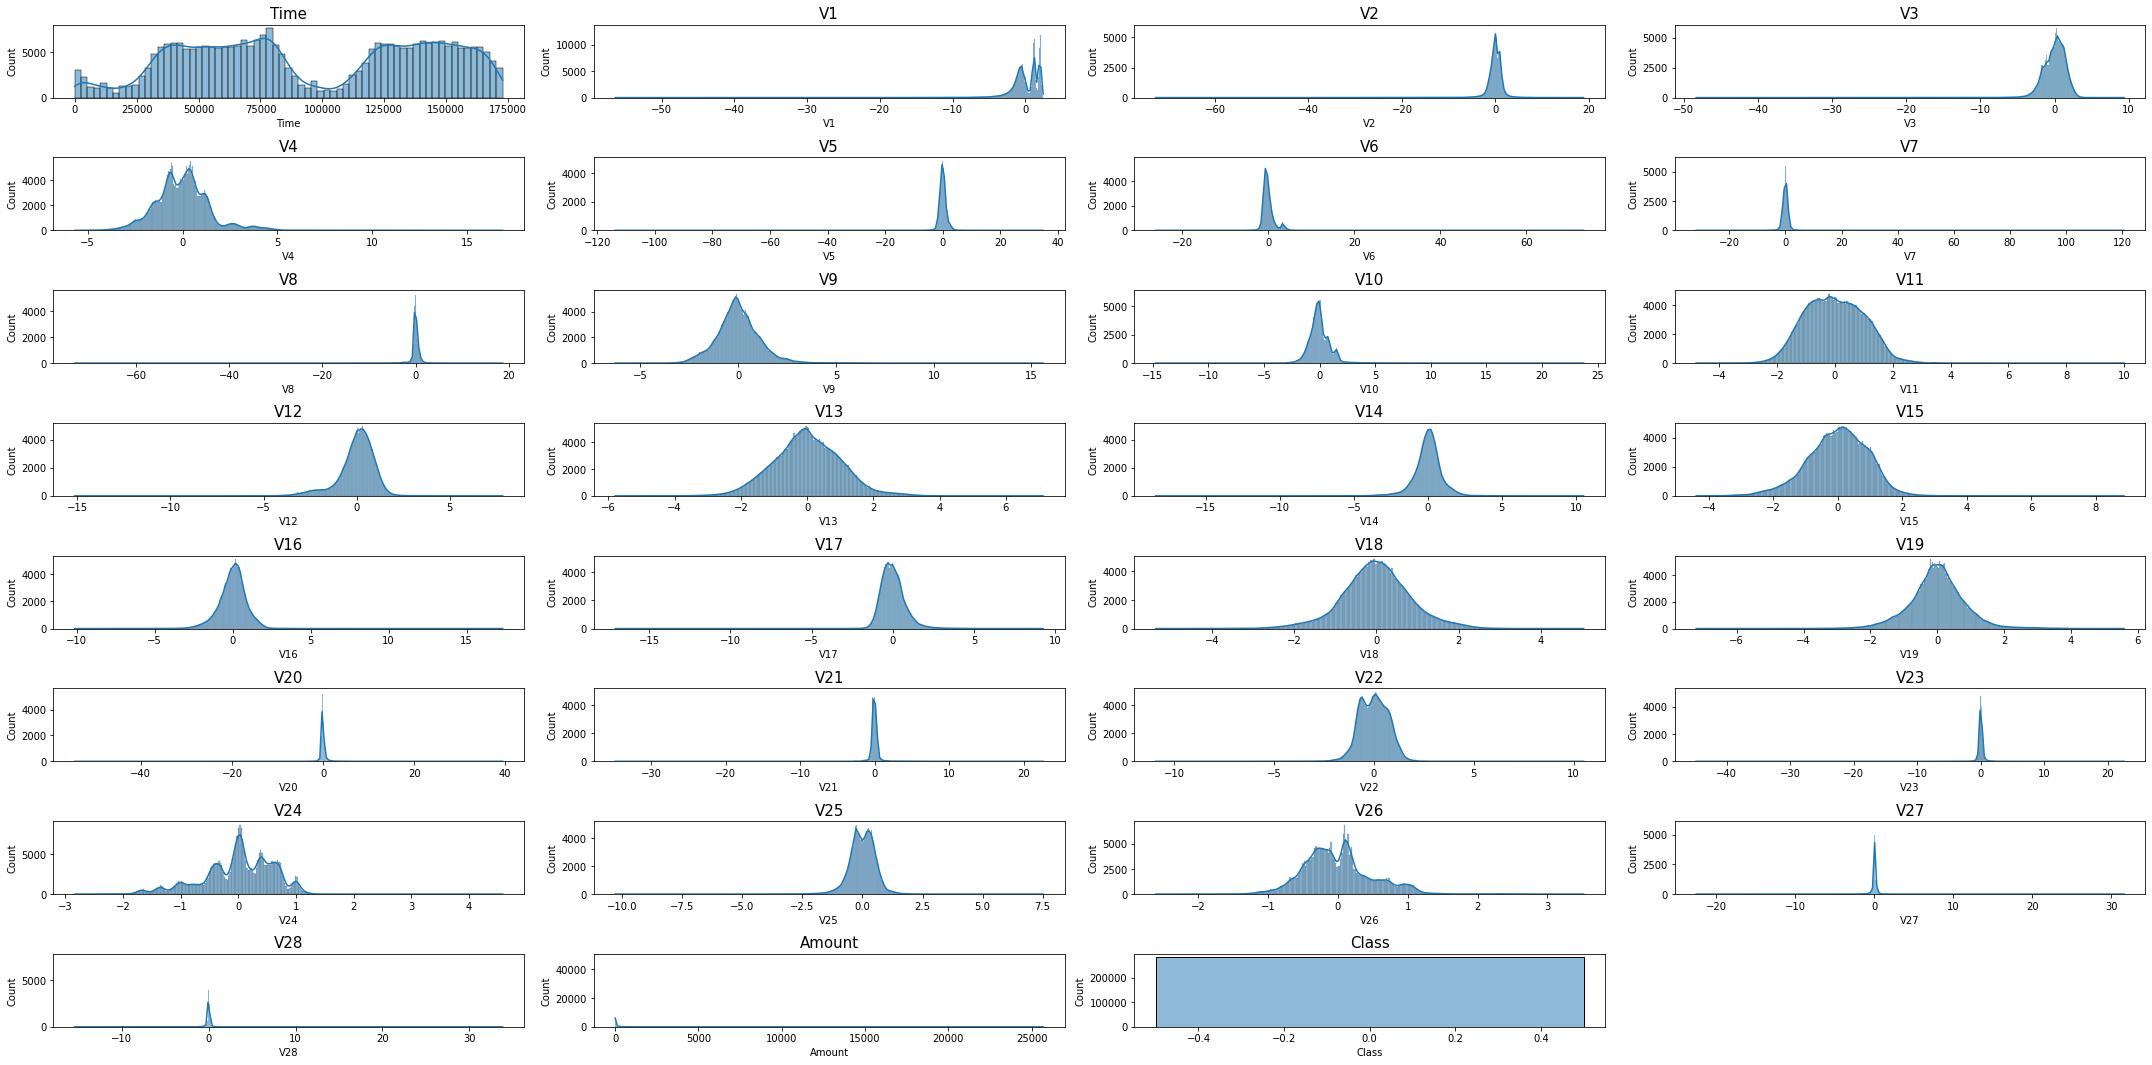

In [29]:
cols_0 = list(dtp_c0)
plt.figure(figsize = (30, 20))
for i in range(len(cols_0)):
    plt.subplot(len(cols_0)//3+1, 4, i + 1)
    sns.histplot(dtp_c0[cols_0[i]], kde=True)
    plt.title(cols_0[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

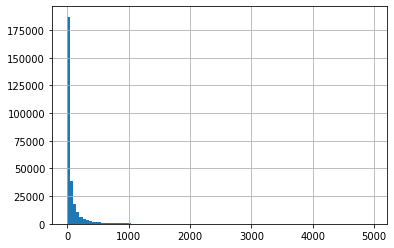

In [30]:
dtp_c0["Amount"].loc[dtp_c0["Amount"] < 5000].hist(bins=100);

### **Class = 1**

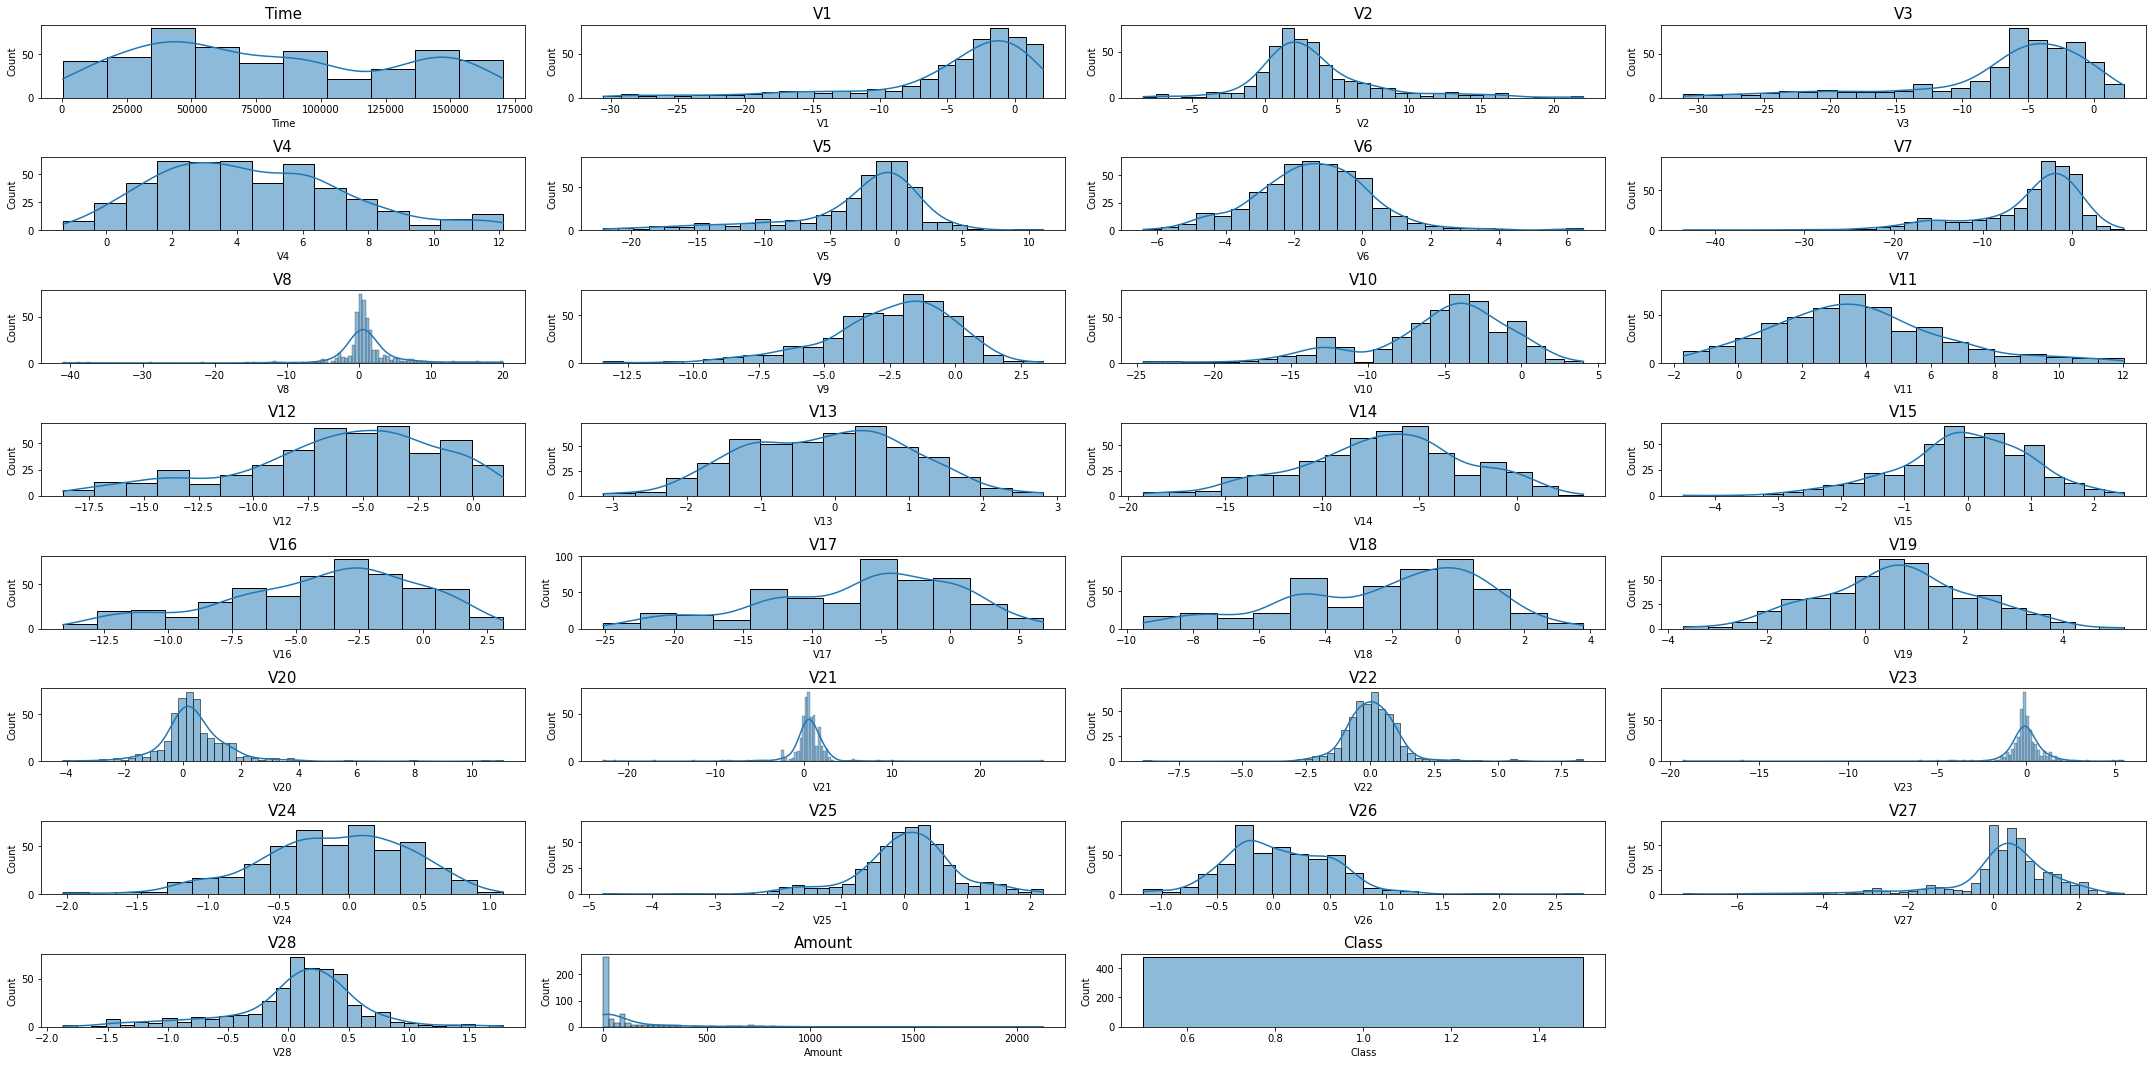

In [31]:
cols_1 = list(dtp_c1.columns)
plt.figure(figsize = (30, 20))
for i in range(len(cols_1)):
    plt.subplot(len(cols_1)//3+1, 4, i + 1)
    sns.histplot(dtp_c1[cols_1[i]], kde=True)
    plt.title(cols_1[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

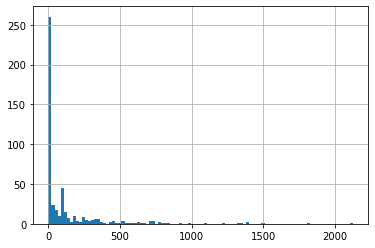

In [32]:
dtp_c1["Amount"].loc[dtp_c1["Amount"] < 5000].hist(bins=100);

## **STEP 7 : DATA PREPROCESSING**

### **Multicolinearity Test**

In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = dtp.drop(['Class', 'Time'], axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(dtp.values, i) for i in range(len(dtp.drop(['Class', 'Time'], axis=1).columns))]
vif_data

,feature,VIF
0,V1,2.353494
1,V2,1.641115
2,V3,3.935012
3,V4,1.321541
4,V5,1.175845
5,V6,2.768500
6,V7,1.534962
7,V8,2.597499
8,V9,1.100627
9,V10,1.038344


## **STEP 8 : DEFINE MODE**

### **Scalling**

In [34]:
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dtp['scaled_amount'] = scaler.fit_transform(dtp['Amount'].values.reshape(-1,1))
dtp['scaled_time'] = scaler.fit_transform(dtp['Time'].values.reshape(-1,1))

dtp.drop(['Time','Amount'], axis=1, inplace=True)

In [35]:
X=dtp.drop(['Class'], axis=1)
y=dtp['Class']

In [36]:
X.value_counts()

V1          V2          V3         V4          V5          V6          V7          V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20         V21        V22        V23        V24        V25        V26        V27        V28         scaled_amount  scaled_time
 2.454930   -0.989065   -2.512114  -1.877104    0.081287   -0.831825   -0.240601   -0.467361  -1.949390   1.737065  -1.553888  -1.361226   0.249681   0.210405  -0.049820  -0.857286   0.362569  -0.126316   0.143420  -0.437697   -0.074210   0.247125  -0.037124  -0.075137   0.445896   0.102445  -0.056362  -0.079442   0.000311       0.753391       1
-0.637176    1.448759    2.526165   2.670064   -0.091096    0.230252    0.375036    0.197266  -1.808595   0.888109   1.564407   0.732581   0.885245   0.190510   0.679902   0.255051  -0.276555   0.366125   1.026619   0.389769   -0.113912  -0.283420  -0.076983   0.515285  -0.084417   0.010793   0.335427   0.15

In [37]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

### **PCA**

In [38]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=3, random_state=77).fit_transform(X.values)

### **AIC & BIC**

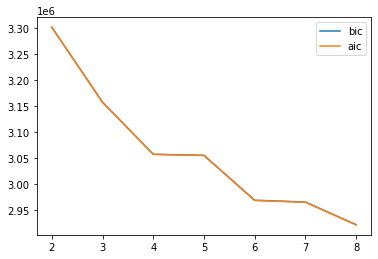

In [39]:
from sklearn.mixture import GaussianMixture

n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='tied').fit(X_pca)
    bic.append(gm.bic(X_pca))
    aic.append(gm.aic(X_pca))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

In [40]:
GM = GaussianMixture(n_components=8).fit(dtp)

**Sesuai dengan AIC dan BIC Score maka  penetapan n_components = 8**

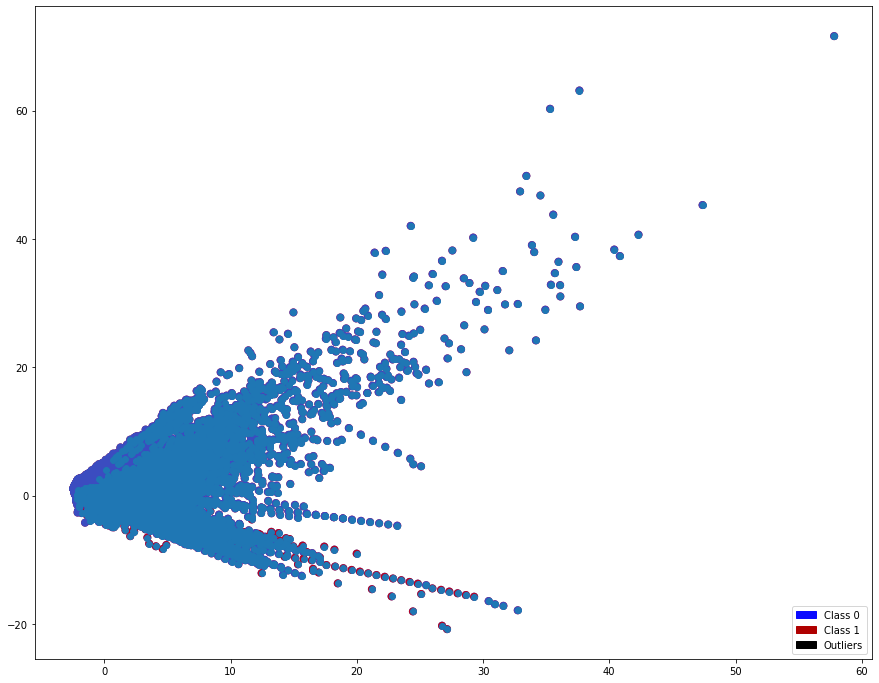

In [41]:
plt.figure(figsize = (15, 12))
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='Class 0', linewidths=2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Class 1', linewidths=2)
scores = GM.score_samples(dtp)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X_pca[index]
plt.scatter(outliers[:,0],outliers[:,1], cmap='coolwarm', label ='Outliers')


blue_patch = mpatches.Patch(color='#0A0AFF', label='Class 0')
red_patch = mpatches.Patch(color='#AF0000', label='Class 1')
black_patch = mpatches.Patch(color='#000000', label='Outliers')
plt.legend(handles=[blue_patch, red_patch, black_patch], loc='lower right')


**Dikarenakan adanya imbalance label, maka akan dilakukan analisis dengan menggunakan 3d scatterplot**

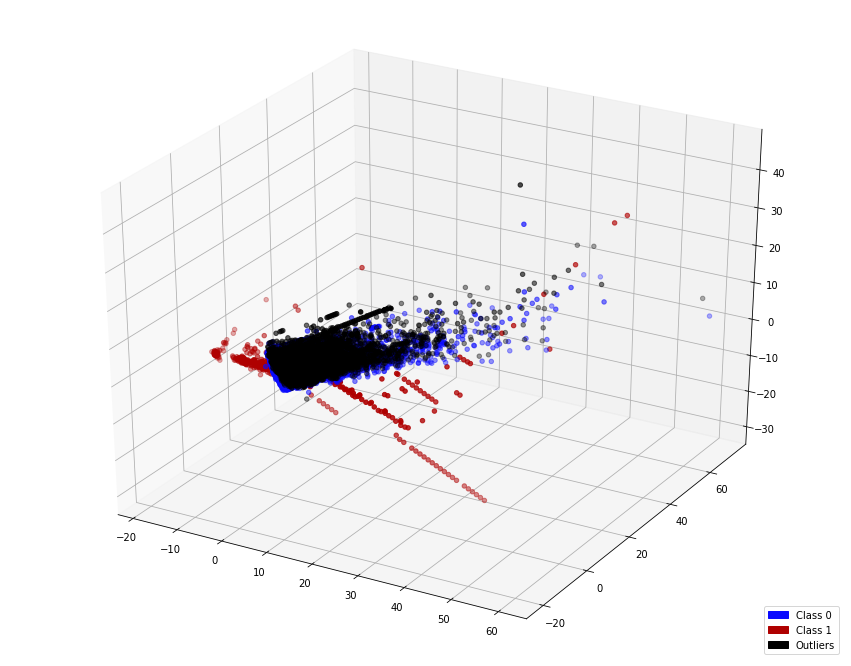

In [42]:
from mpl_toolkits.mplot3d import Axes3D

X3D_no=PCA(n_components=3).fit_transform(X.loc[dtp[dtp.Class== 0].index.values])
X3D_yes=PCA(n_components=3).fit_transform(X.loc[dtp[dtp.Class== 1].index.values])
fig = plt.figure(figsize = (15, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X3D_yes[:,0],X3D_yes[:,1],X3D_yes[:,2], color='#AF0000')
ax.scatter(X3D_no[:,0],X3D_no[:,1],X3D_no[:,2], color='#0A0AFF')
ax.scatter(outliers[:,0],outliers[:,1],outliers[:,2], color='#000000')

plt.legend(handles=[blue_patch, red_patch, black_patch], loc='lower right')


**Dapat terlihat jelas Outlier terdapat ditengah tengah, hal tersebut mengakibatkan tidak terlihatnya outlier pada grafik 2d**

## **STEP 9 : CONCLUSION**

* Model berhasil melakukan prediksi sesuai dengan n-components yang ditetapkan yaitu 3
* Model telah berhasil melakukan pemisahan antara data outlier dan class namun harus dengan bantuan sebaran grafik 3D